In [9]:
# modulos y librerias
import ydata_profiling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [10]:
catalog.list()

['hado_22',
 'hado_21',
 'hado_20',
 'hado_19',
 'hado_18',
 'hado_17',
 'hado_concat',
 'hado_concat_clean',
 'hado_values',
 'parameters']

In [11]:
df = catalog.load('hado_concat_clean')

[06/29/23 15:56:54] INFO     Loading data from 'hado_concat_clean' (CSVDataSet)...              data_catalog.py:345

# 1. EDA

Realizar un EDA para entender mejor cada variable, su distribución y su relación con 'n_estancias'. Este paso podría incluir la creación de histogramas, gráficos de caja y bigotes y gráficos de dispersión.

## 1.1 Inspeccion de los datos

In [12]:
df.head()

,h_procedencia,s_procedencia,ap,otros,diagnostico,motivo_ing,paliativo_onc_noc,paliativo_no_onc_noc,fiebre,disnea,dolor,delirium,otros_1,p_terminal,agonia,ps_ecog,barthel,gds_fast,eva_ing,otros_2,otros_complicaciones,n_estancias,n_visitas,sedacion,motivo_alta,medico,year,ast_anorx,agudo_estable,cronico_reag,transfusion,paracentesis,toracocentesis,ayuntamiento,fecha_alta,¿?,toracocen
0,gil casares,upal,no,no,cancer orl,control de sintomas,si,si,no,no,si,no,no,si,no,40,300,no,no,no,reingreso en urgencias,210,100,no,reingreso,valdes,2017,si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clinico,oncologia,no,no,melanoma vulvar,mal control dolor,si,no,no,no,si,no,no,si,no,34,no,no,no,no,met pulmonares y digest,240,80,no,exitus,galego feal,2017,si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,clinico,mir,no,no,cancer broncogenico,control evolutivo,si,si,no,si,no,no,no,no,no,34,400,no,no,no,no,140,60,no,fin de cuidados,lopez renedo,2017,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,clinico,digestivo,no,no,cirrosis hepatica,admininistacion octreotido,no,no,no,no,no,no,no,no,no,10,900,no,no,no,no,10,10,no,fin de cuidados,lopez renedo,2017,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,clinico,urgencias,no,no,neplasia de mama estadio IV,control de sintomas,si,no,no,si,si,no,no,si,no,40,300,no,70,no,no,20,10,no,exitus,lopez renedo,2017,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   h_procedencia         4014 non-null   object
 1   s_procedencia         4014 non-null   object
 2   ap                    4013 non-null   object
 3   otros                 2958 non-null   object
 4   diagnostico           4011 non-null   object
 5   motivo_ing            4014 non-null   object
 6   paliativo_onc_noc     4013 non-null   object
 7   paliativo_no_onc_noc  4012 non-null   object
 8   fiebre                4012 non-null   object
 9   disnea                4013 non-null   object
 10  dolor                 4014 non-null   object
 11  delirium              4013 non-null   object
 12  otros_1               1549 non-null   object
 13  p_terminal            1547 non-null   object
 14  agonia                2955 non-null   object
 15  ps_ecog               4013 non-null   

In [14]:
df.describe()

,n_estancias,n_visitas,year
count,4.014000e+03,4014.000000,4014.000000
mean,7.122465e+03,60.226707,2019.904584
std,4.409831e+05,69.569345,1.786405
min,0.000000e+00,0.000000,2017.000000
25%,4.000000e+01,20.000000,2018.000000
50%,9.000000e+01,40.000000,2020.000000
75%,1.800000e+02,70.000000,2022.000000
max,2.793914e+07,990.000000,2022.000000


In [15]:
df.isna().sum()

h_procedencia              0
s_procedencia              0
ap                         1
otros                   1056
diagnostico                3
motivo_ing                 0
paliativo_onc_noc          1
paliativo_no_onc_noc       2
fiebre                     2
disnea                     1
dolor                      0
delirium                   1
otros_1                 2465
p_terminal              2467
agonia                  1059
ps_ecog                    1
barthel                    1
gds_fast                   0
eva_ing                 2466
otros_2                 2466
otros_complicaciones    1058
n_estancias                0
n_visitas                  0
sedacion                   5
motivo_alta                0
medico                     1
year                       0
ast_anorx                  0
agudo_estable           1551
cronico_reag            1550
transfusion             1550
paracentesis            1550
toracocentesis          2607
ayuntamiento            1551
fecha_alta    

In [17]:
# Observamos los valores y los ordenamos de manera descendente
sorted(df['n_estancias'], reverse=True)
# Veo que 27939140 es un valor fuera de lo normal y lo saco

[27939140,
 7122,
 7122,
 7122,
 7122,
 7122,
 7122,
 7122,
 3040,
 2040,
 1880,
 1800,
 1710,
 1660,
 1610,
 1540,
 1500,
 1420,
 1410,
 1410,
 1400,
 1380,
 1350,
 1340,
 1330,
 1310,
 1300,
 1260,
 1250,
 1230,
 1190,
 1190,
 1180,
 1170,
 1110,
 1090,
 1070,
 1060,
 1040,
 1030,
 1020,
 1020,
 1020,
 1010,
 1000,
 1000,
 1000,
 1000,
 990,
 980,
 970,
 970,
 960,
 960,
 950,
 950,
 930,
 920,
 920,
 910,
 900,
 900,
 890,
 890,
 890,
 880,
 870,
 860,
 840,
 840,
 840,
 800,
 790,
 790,
 790,
 790,
 780,
 780,
 780,
 770,
 770,
 770,
 760,
 750,
 750,
 740,
 740,
 740,
 740,
 740,
 740,
 730,
 730,
 730,
 720,
 720,
 720,
 720,
 720,
 710,
 710,
 710,
 700,
 700,
 700,
 690,
 680,
 670,
 670,
 670,
 670,
 660,
 660,
 660,
 660,
 660,
 660,
 650,
 650,
 650,
 650,
 650,
 650,
 640,
 640,
 640,
 640,
 630,
 630,
 630,
 630,
 630,
 620,
 620,
 620,
 620,
 620,
 610,
 610,
 610,
 600,
 600,
 600,
 600,
 600,
 600,
 590,
 580,
 580,
 580,
 580,
 580,
 580,
 580,
 580,
 570,
 570,
 570,


In [18]:
# Saco el índice para hacer el drop
drop_n_estancias = df[df['n_estancias'] == 27939140].index
df = df.drop(drop_n_estancias)

In [19]:
df['n_estancias'].max()

7122

### 1.1.1 Análisis de valores ausentes con `missingno`☠️

<Axes: >

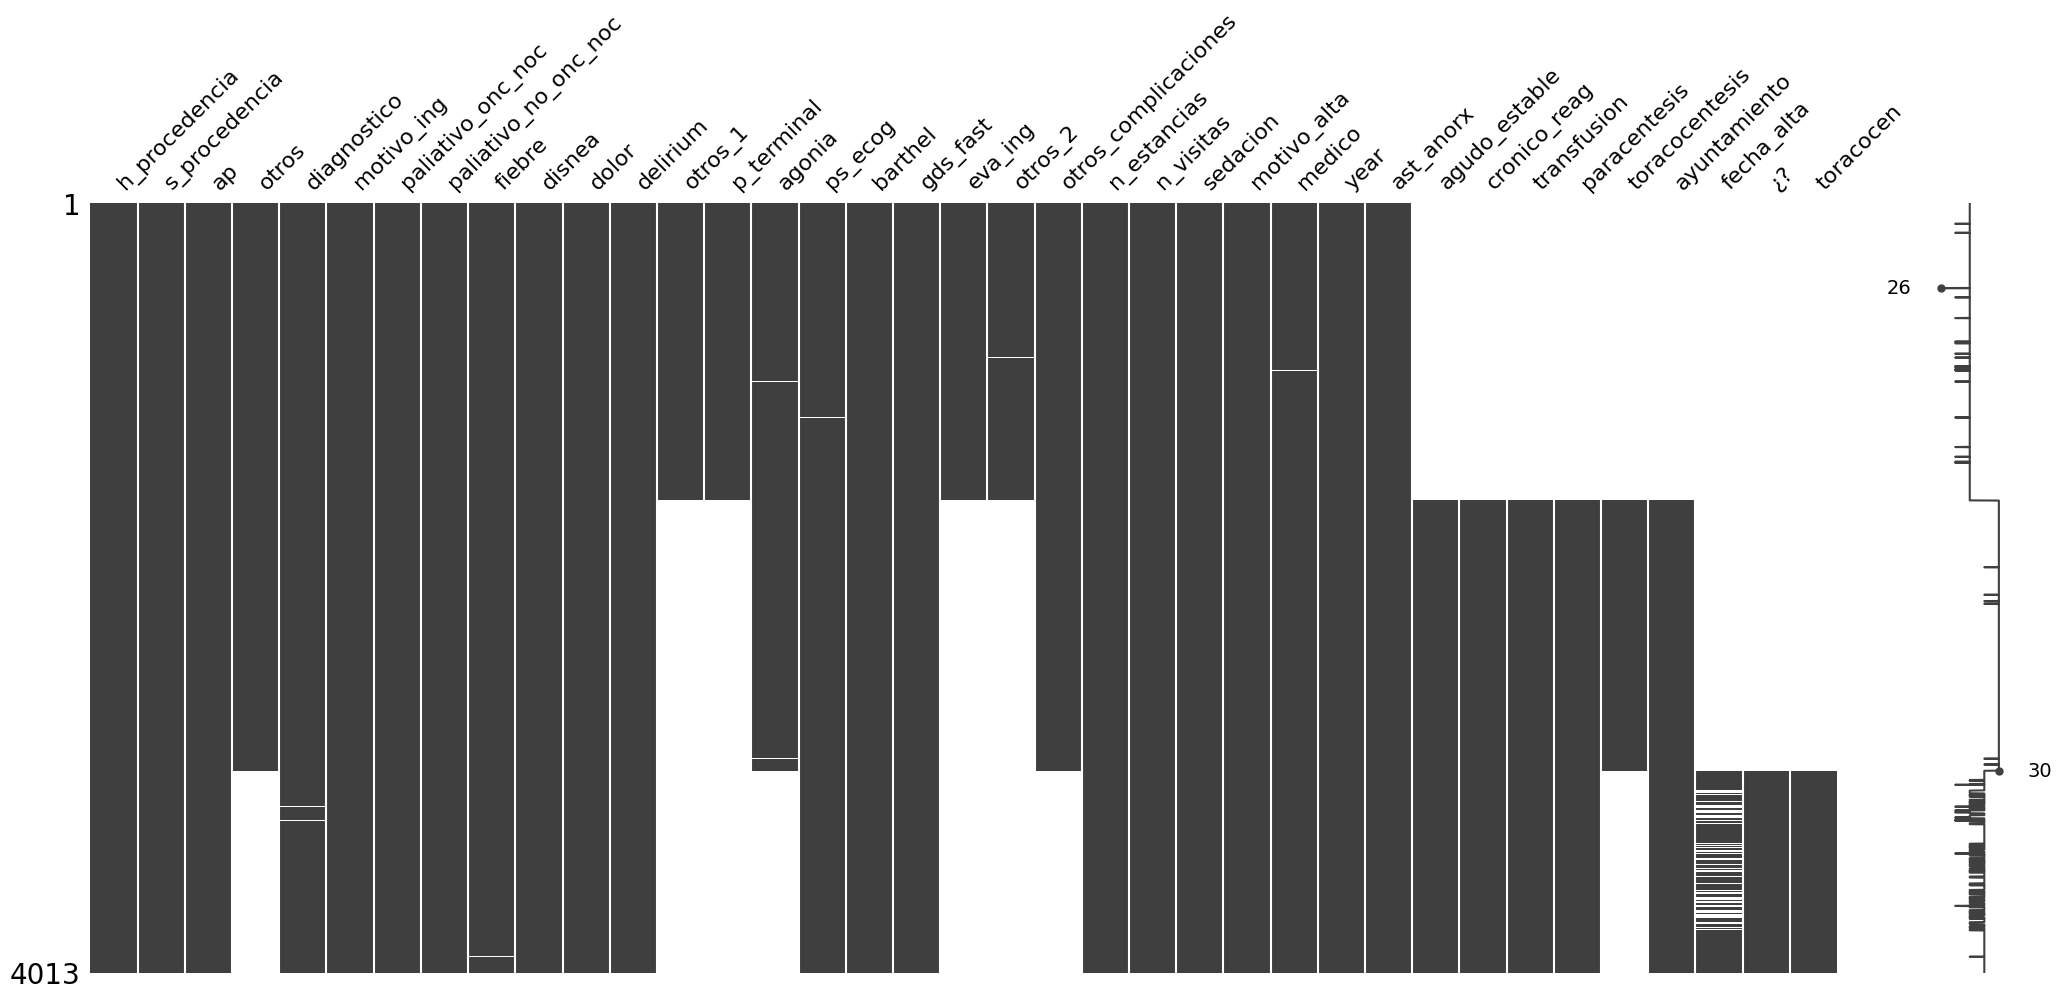

In [20]:
import missingno as msno
msno.matrix(df)

### 1.1.2 Análisis de valores atípicos (Outliers)

<Axes: >

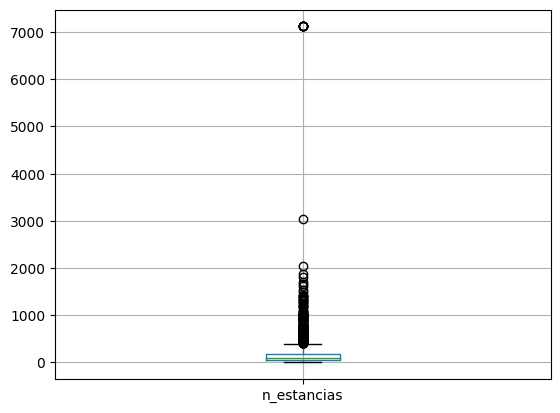

In [21]:
df.boxplot(column='n_estancias')

### 1.1.3 Análisis de la relación entre variables categóricas y numéricas

<Axes: xlabel='diagnostico', ylabel='n_estancias'>

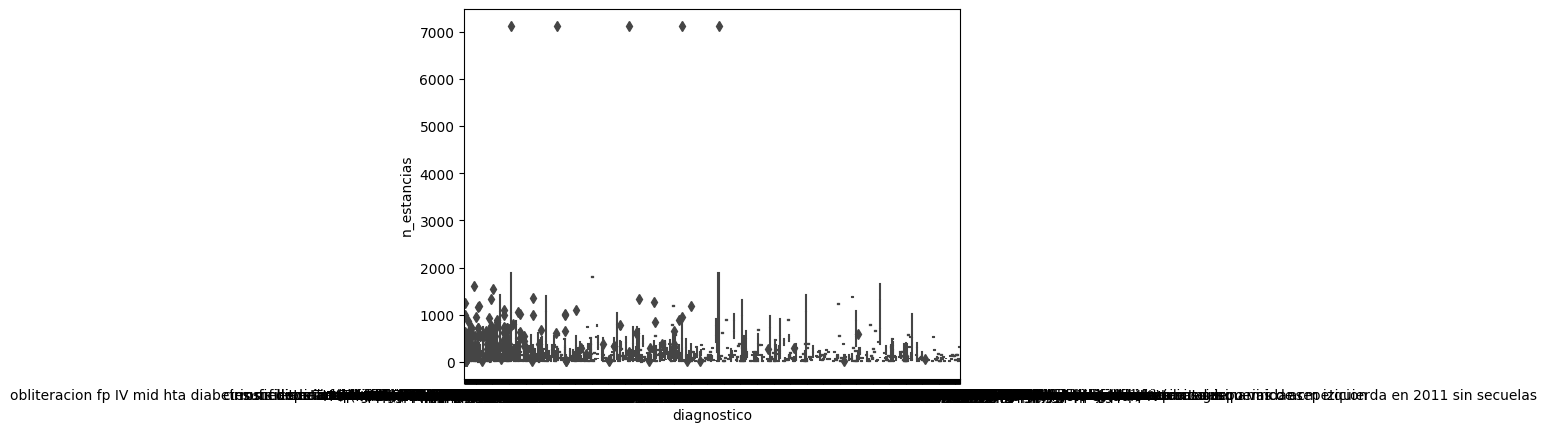

In [22]:
import seaborn as sns
sns.boxplot(x='diagnostico', y='n_estancias', data=df)

### 1.1.4 Análisis de distribuciones de probabilidad

[06/29/23 15:59:30] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_15128\1986926358.py:1:                            
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df['n_estancias'])                                                     
                                                                                                                   

<Axes: xlabel='n_estancias', ylabel='Density'>

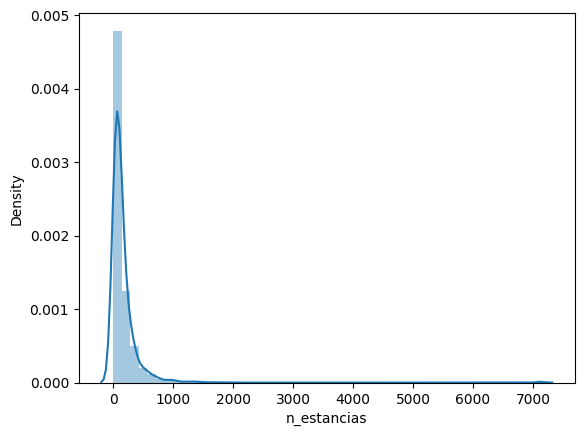

In [23]:
sns.distplot(df['n_estancias'])

### 1.1.5 Creación de perfiles de informes de datos

In [27]:
import ydata_profiling
profile = ydata_profiling.ProfileReport(df)
profile.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

[06/29/23 16:03:15] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

[06/29/23 16:03:16] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

[06/29/23 16:03:17] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

[06/29/23 16:03:19] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

[06/29/23 16:03:20] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

[06/29/23 16:03:21] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

[06/29/23 16:03:22] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

[06/29/23 16:03:23] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

[06/29/23 16:03:24] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

[06/29/23 16:03:26] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile.to_file("output.html")

[06/29/23 15:59:34] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_15128\2253697665.py:1:                            
                             DeprecationWarning: `import pandas_profiling` is going to be                          
                             deprecated by April 1st. Please use `import ydata_profiling` instead.                 
                               import pandas_profiling                                                             
                                                                                                                   

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

[06/29/23 15:59:37] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\pandas_profiling\mod                
                             el\correlations.py:67: UserWarning: There was an attempt to calculate                 
                             the auto correlation, but this failed.                                                
                             To hide this warning, disable the calculation                                         
                             (using `df.profile_report(correlations={"auto": {"calculate":                         
                             False}})`                                                                             
                             If this is problematic for your use case, please report this as an                    
                             issue:                                                                                
                             https://github.com/ydataai/pandas-profiling/issues                                    
                             (include the error message: 'No data; `observed` has size 0.')                        
                               warnings.warn(                                                                      
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\pandas_profiling\vis                
                             ualisation\context.py:85: MatplotlibDeprecationWarning: mplDeprecation                
                             was deprecated in Matplotlib 3.6 and will be removed two minor                        
                             releases later. Use matplotlib.MatplotlibDeprecationWarning instead.                  
                               warnings.filterwarnings("ignore",                                                   
                             category=matplotlib.cbook.mplDeprecation)                                             
                                                                                                                   

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.1.6 Verificación de la linealidad

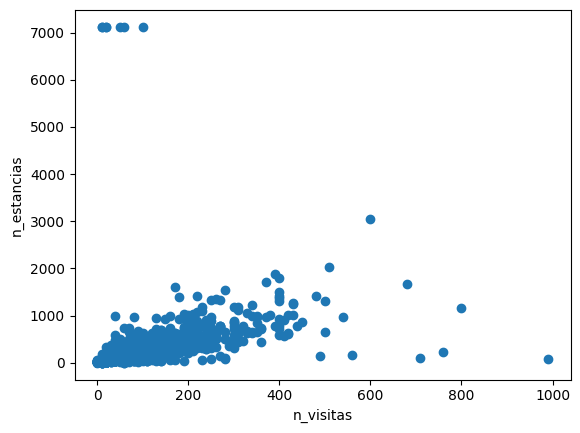

In [28]:
plt.scatter(df['n_visitas'], df['n_estancias'])
plt.xlabel('n_visitas', )
plt.ylabel('n_estancias')
plt.show()

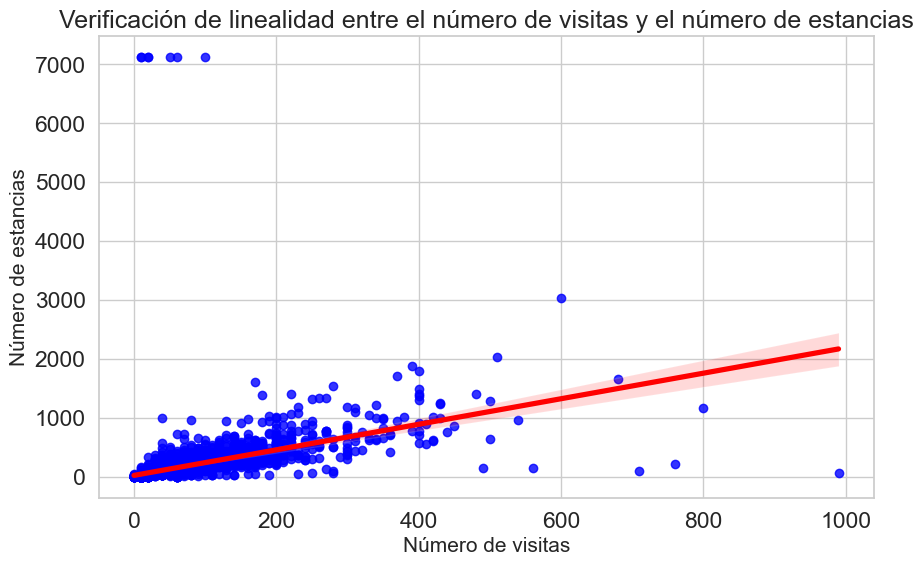

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establece el estilo y el contexto para hacer que los gráficos sean más bonitos
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Crea una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Dibuja un gráfico de dispersión con un ajuste lineal
sns.regplot(x='n_visitas', y='n_estancias', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Establece las etiquetas de los ejes y el título
ax.set_xlabel('Número de visitas', fontsize=15)
ax.set_ylabel('Número de estancias', fontsize=15)
ax.set_title('Verificación de linealidad entre el número de visitas y el número de estancias', fontsize=18)

# Muestra el gráfico
plt.show()


## 1.2 Análisis univariado

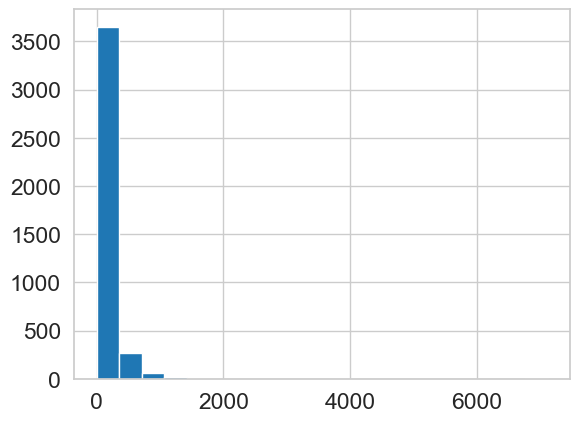

In [30]:
df['n_estancias'].hist(bins=20);

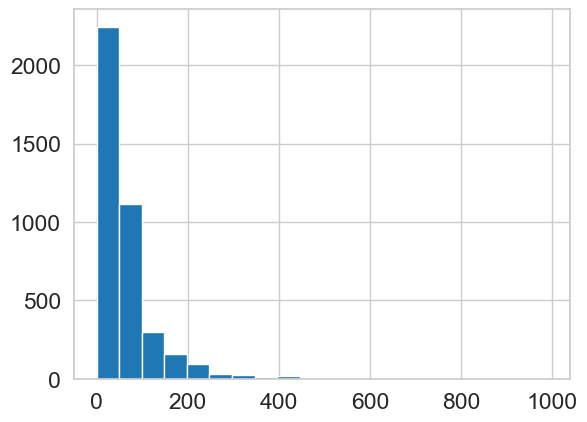

In [31]:
df['n_visitas'].hist(bins=20);

## 1.3 Análisis bivariado

In [32]:
df[['n_visitas','n_estancias']].sort_values(ascending=False, by='n_visitas')

,n_visitas,n_estancias
3340,990,70
3692,800,1170
3021,760,230
2658,710,110
3115,680,1660
735,600,3040
1837,560,160
2323,540,970
1972,510,2040
1403,500,1300


In [33]:
df[['n_visitas','n_estancias']].sort_values(ascending=False, by='n_estancias')
# Detecto que 7122 estancias puede ser un dato fuera de lo comun y sospecho que 3040 y 2040 tambien

,n_visitas,n_estancias
2910,50,7122
2700,10,7122
2843,20,7122
2652,100,7122
2703,10,7122
2677,20,7122
3118,60,7122
735,600,3040
1972,510,2040
3301,390,1880


In [34]:
round(df.groupby('n_visitas')['n_estancias'].mean(),0)

n_visitas
0        17.0
10       45.0
20       72.0
30       78.0
40      106.0
50      145.0
60      168.0
70      180.0
80      200.0
90      236.0
100     325.0
110     246.0
120     318.0
130     343.0
140     350.0
150     384.0
160     363.0
170     417.0
180     454.0
190     485.0
200     516.0
210     538.0
220     638.0
230     558.0
240     527.0
250     669.0
260     647.0
270     761.0
280     565.0
290     350.0
300     656.0
310     808.0
320     620.0
330     790.0
340     878.0
350     870.0
360     627.0
370    1335.0
380    1020.0
390    1335.0
400    1156.0
410     740.0
420     757.0
430    1173.0
440     770.0
450     870.0
480    1410.0
490     150.0
500     975.0
510    2040.0
540     970.0
560     160.0
600    3040.0
680    1660.0
710     110.0
760     230.0
800    1170.0
990      70.0
Name: n_estancias, dtype: float64

In [35]:
round(df.groupby('diagnostico')['n_estancias'].mean(),0)

diagnostico
0steomielitis femur                                                                                                                                                                                                              130.0
ITU (infeccion del tracto urinario)                                                                                                                                                                                              108.0
ITU (infeccion del tracto urinario) (infeccion del tracto urinario)                                                                                                                                                               50.0
ITU (infeccion del tracto urinario) acv                                                                                                                                                                                           15.0
ITU (infeccion del tracto urinario) agitacion                   

In [36]:
round(df.groupby('dolor')['n_estancias'].mean(),0)

dolor
ni    150.0
no    136.0
si    208.0
Name: n_estancias, dtype: float64

In [37]:
round(df.groupby('fiebre')['n_estancias'].mean(),0)

fiebre
b     490.0
ni    150.0
no    158.0
si    189.0
Name: n_estancias, dtype: float64

In [38]:
round(df.groupby('h_procedencia')['n_estancias'].mean(),0)

h_procedencia
ap                       20.0
chuac                   152.0
clinico                 186.0
conxo                   183.0
gil casares             144.0
hula                     50.0
lucus augusti            20.0
no                      117.0
pontevedra               20.0
provincial              212.0
quiron la coruna         80.0
residencia               28.0
rosaleda                317.0
salnes                   70.0
san rafael la coruna      0.0
si                       67.0
Name: n_estancias, dtype: float64

In [39]:
round(df.groupby('motivo_ing')['n_estancias'].mean(),0)

motivo_ing
adiestramiento nutricion y control sintomas                                                                               900.0
admininistacion octreotido                                                                                                 26.0
admininistracio de antibiotico IV                                                                                         130.0
administracion 5 azatadina                                                                                                 60.0
administracion aciclovir IV                                                                                               110.0
administracion alprostadil IV                                                                                             120.0
administracion antibiotico IV                                                                                             160.0
administracion calcio IV                                                                     

In [40]:
df.corr()

[06/29/23 16:08:36] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_15128\1134722465.py:1:                            
                             FutureWarning: The default value of numeric_only in DataFrame.corr is                 
                             deprecated. In a future version, it will default to False. Select only                
                             valid columns or specify the value of numeric_only to silence this                    
                             warning.                                                                              
                               df.corr()                                                                           
                                                                                                                   

,n_estancias,n_visitas,year
n_estancias,1.000000,0.430415,0.031265
n_visitas,0.430415,1.000000,0.032375
year,0.031265,0.032375,1.000000


## 1.4 Visualización de datos

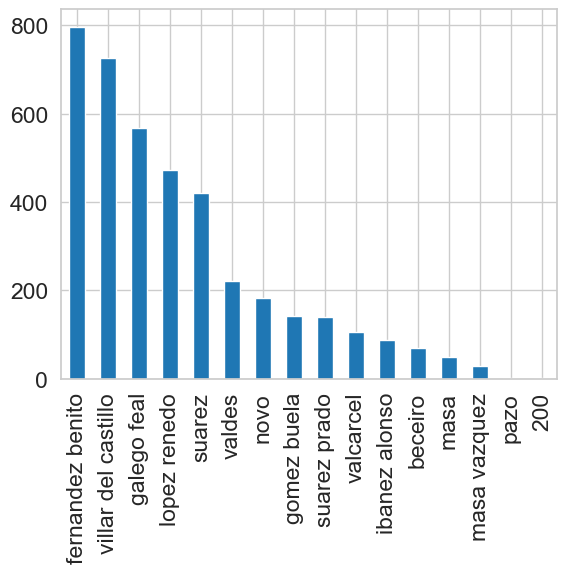

In [41]:
import matplotlib.pyplot as plt

# Gráfico de barras
df['medico'].value_counts().plot(kind='bar')
plt.show()

[06/29/23 16:09:30] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_15128\2312080331.py:4:                            
                             FutureWarning: The default value of numeric_only in DataFrame.corr is                 
                             deprecated. In a future version, it will default to False. Select only                
                             valid columns or specify the value of numeric_only to silence this                    
                             warning.                                                                              
                               sns.heatmap(df.corr(), annot=True)                                                  
                                                                                                                   

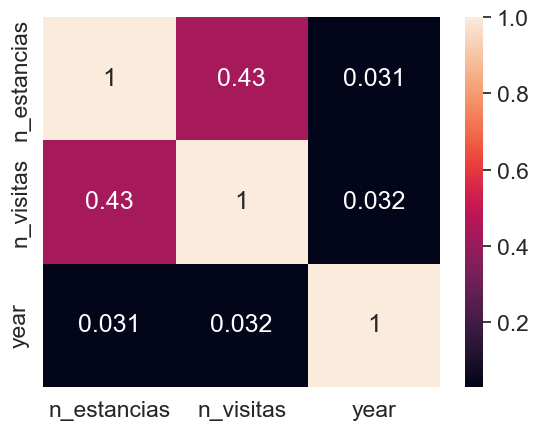

In [44]:
import seaborn as sns

# Mapa de calor
sns.heatmap(df.corr(), annot=True)
plt.show()

# 2. Data preprocessing

## 2.1 Limpieza de datos

# 3. Feature selection

# 4. Regression model training